In [70]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [71]:
#Carga de dataset

df = pd.read_csv('./data/training_series.csv')
data = df['Close'].array

In [72]:
df

,Year,Month,Date,Open,High,Low,Close,Adj Close,Volume
0,2017,1,3,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017,1,4,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017,1,5,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017,1,6,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017,1,9,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000
...,...,...,...,...,...,...,...,...,...
1242,2021,12,8,4690.859863,4705.060059,4674.520020,4701.209961,4701.209961,3061550000
1243,2021,12,9,4691.000000,4695.259766,4665.979980,4667.450195,4667.450195,2851660000
1244,2021,12,10,4687.640137,4713.569824,4670.240234,4712.020020,4712.020020,2858310000
1245,2021,12,13,4710.299805,4710.299805,4667.600098,4668.970215,4668.970215,3322050000


In [73]:
#Limpieza de datos y columnas
date = pd.concat([df["Year"], df["Month"], df["Date"]],axis=1)
date.columns = ['year', 'month', 'day']
date = pd.to_datetime(date).astype(int)/ 10**9

/var/folders/ws/sp1qfps14rj2wpf5_71gh44m0000gn/T/ipykernel_3132/2257686908.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  date = pd.to_datetime(date).astype(int)/ 10**9


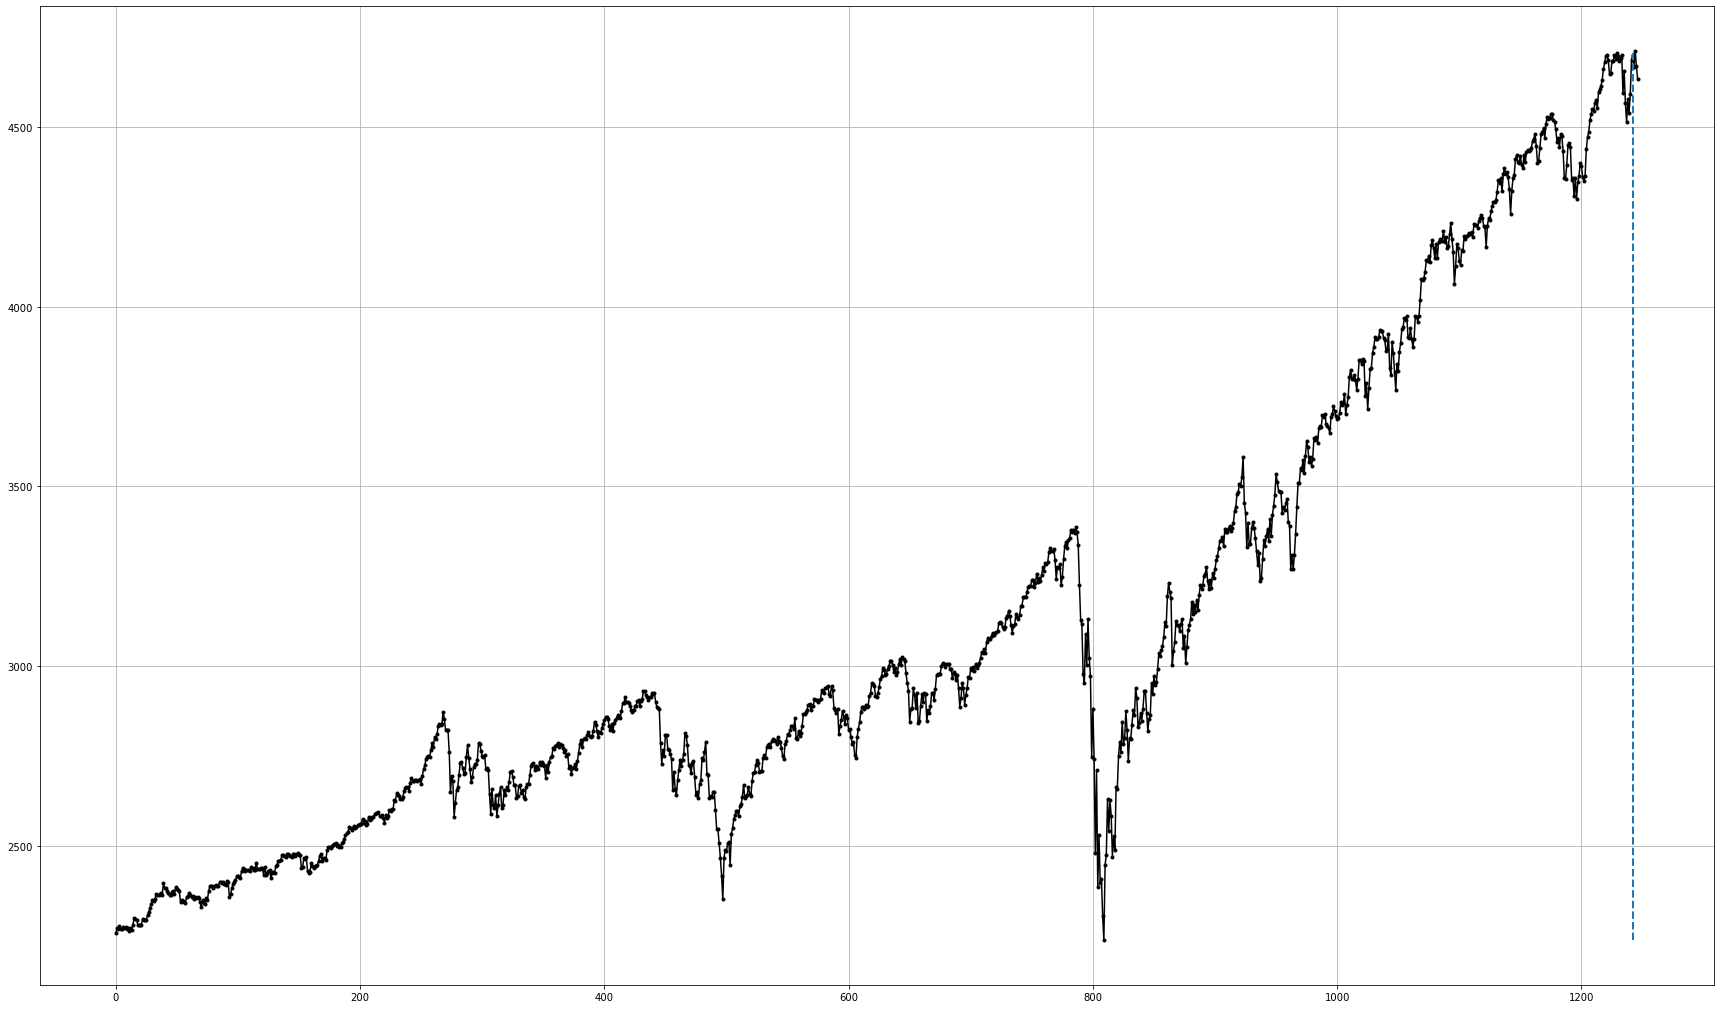

In [74]:
#Plot de la serie de tiempo
plt.figure(figsize=(30, 18))
plt.plot(data, ".-k")
plt.grid()

plt.plot(
    [len(data) - 5, len(data) - 5],
    [min(data), max(data)],
    "--",
    linewidth=2);

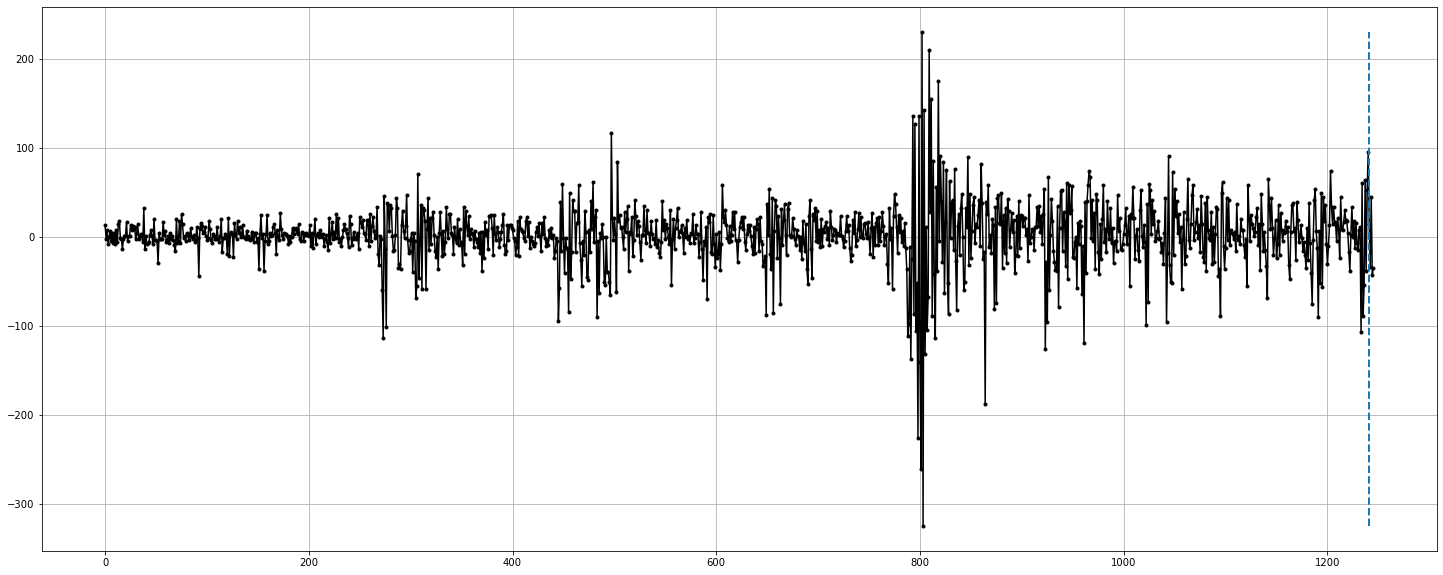

In [75]:
# Se remueve la tendencia
data_d1 = [data[t] - data[t - 1] for t in range(1, len(data))]

# En la gráfica queda la componente cíclica
plt.figure(figsize=(25, 10))
plt.plot(data_d1, ".-k")
plt.grid()
plt.plot(
    [len(data_d1) - 5, len(data_d1) - 5],
    [min(data_d1), max(data_d1)],
    "--",
    linewidth=2,
);

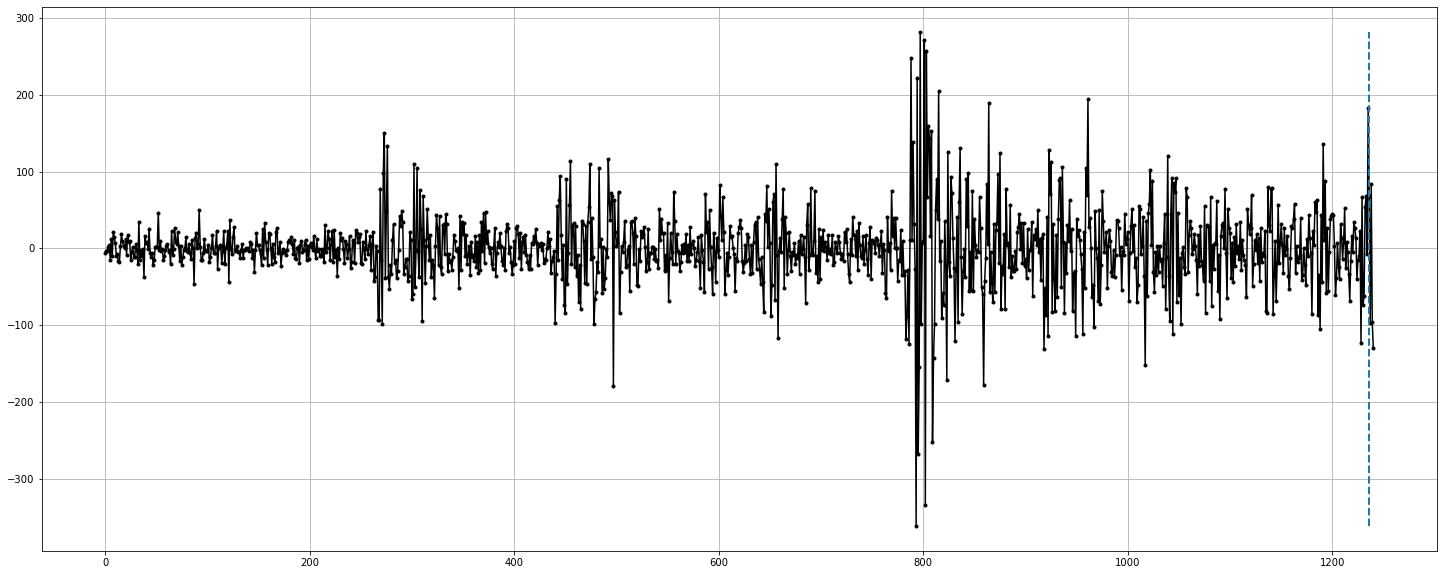

In [76]:
# Se remueve la componente cíclica restando z[t] - z[t-5]
data_d1d5 = [data_d1[t] - data_d1[t - 5] for t in range(5, len(data_d1))]

plt.figure(figsize=(25, 10))
plt.plot(data_d1d5, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d5) - 5, len(data_d1d5) - 5],
    [min(data_d1d5), max(data_d1d5)],
    "--",
    linewidth=2,
);

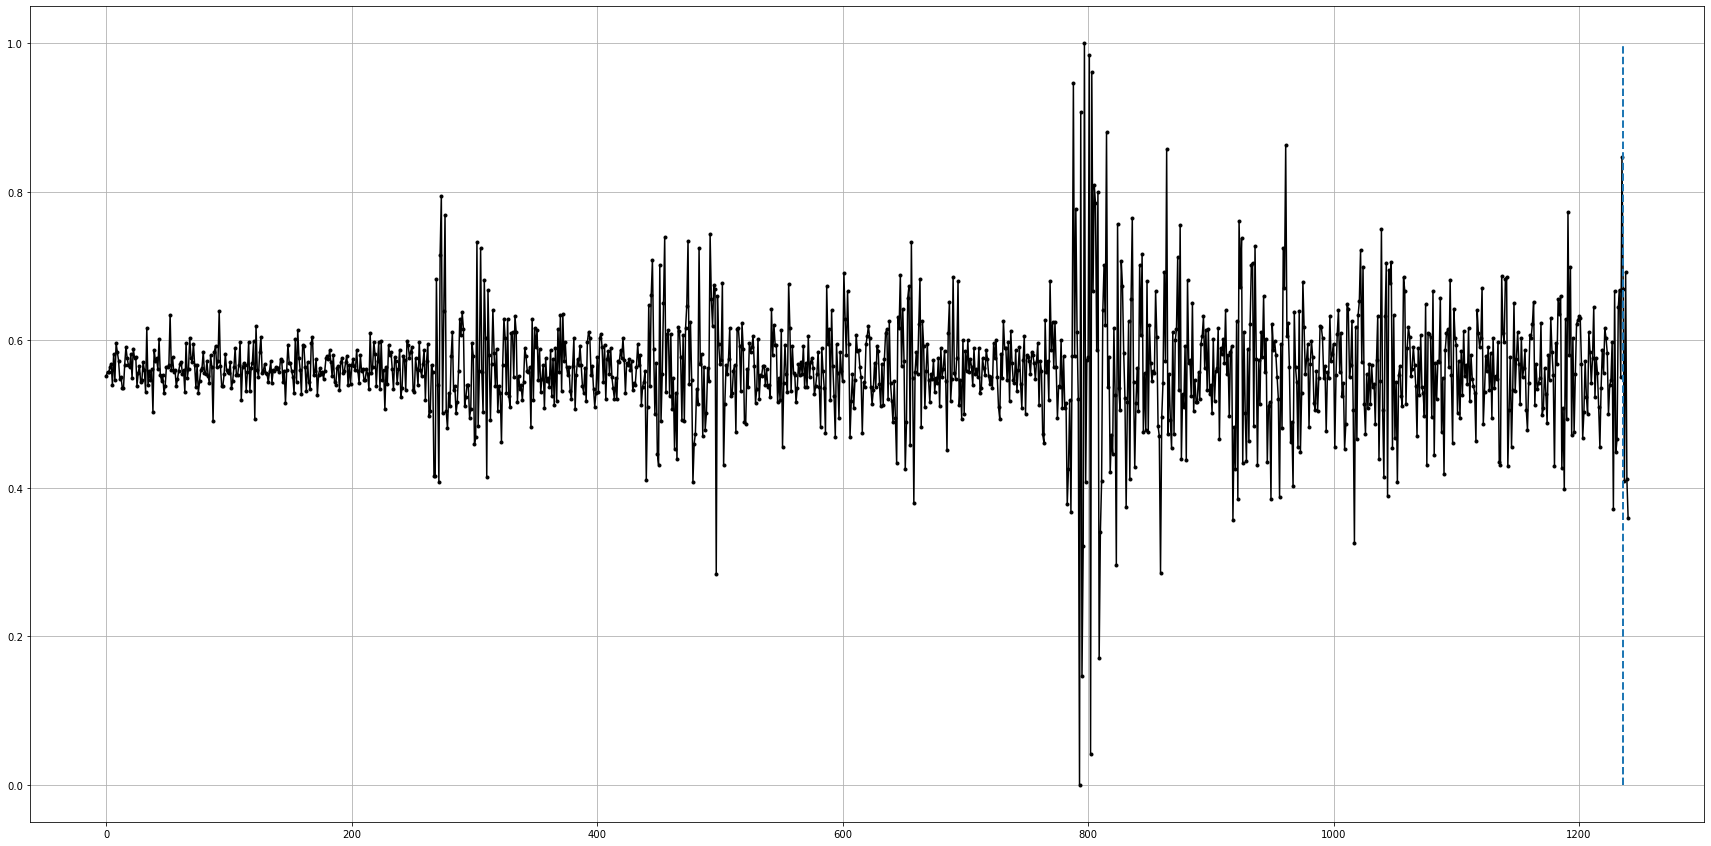

In [77]:
#Se escalan los valores como en el caso anaterior
scaler = MinMaxScaler()
data_d1d5_scaled = scaler.fit_transform(np.array(data_d1d5).reshape(-1, 1))
data_d1d5_scaled = [u[0] for u in data_d1d5_scaled]

plt.figure(figsize=(30, 15))
plt.plot(data_d1d5_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d5_scaled) - 5, len(data_d1d5_scaled) - 5],
    [min(data_d1d5_scaled), max(data_d1d5_scaled)],
    "--",
    linewidth=2,
);

In [78]:
#Se construye la matriz de regresores con los datos de los dias (Xt)
P = 5

Xt = []
dateeee = date[6:].values
for t in range(P - 1, len(dateeee) - 1):
    Xt.append([dateeee[t - n] for n in range(P)])

Iteration 1, loss = 0.08672444
Iteration 2, loss = 0.01717668
Iteration 3, loss = 0.00455478
Iteration 4, loss = 0.01794813
Iteration 5, loss = 0.03161470
Iteration 6, loss = 0.00961434
Iteration 7, loss = 0.00357140
Iteration 8, loss = 0.00698475
Iteration 9, loss = 0.00655077
Iteration 10, loss = 0.00363244
Iteration 11, loss = 0.00306905
Iteration 12, loss = 0.00359720
Iteration 13, loss = 0.00341838
Iteration 14, loss = 0.00297345
Iteration 15, loss = 0.00311966
Iteration 16, loss = 0.00294745
Iteration 17, loss = 0.00291857
Iteration 18, loss = 0.00438492
Iteration 19, loss = 0.00313259
Iteration 20, loss = 0.00342532


/opt/anaconda3/envs/aves/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


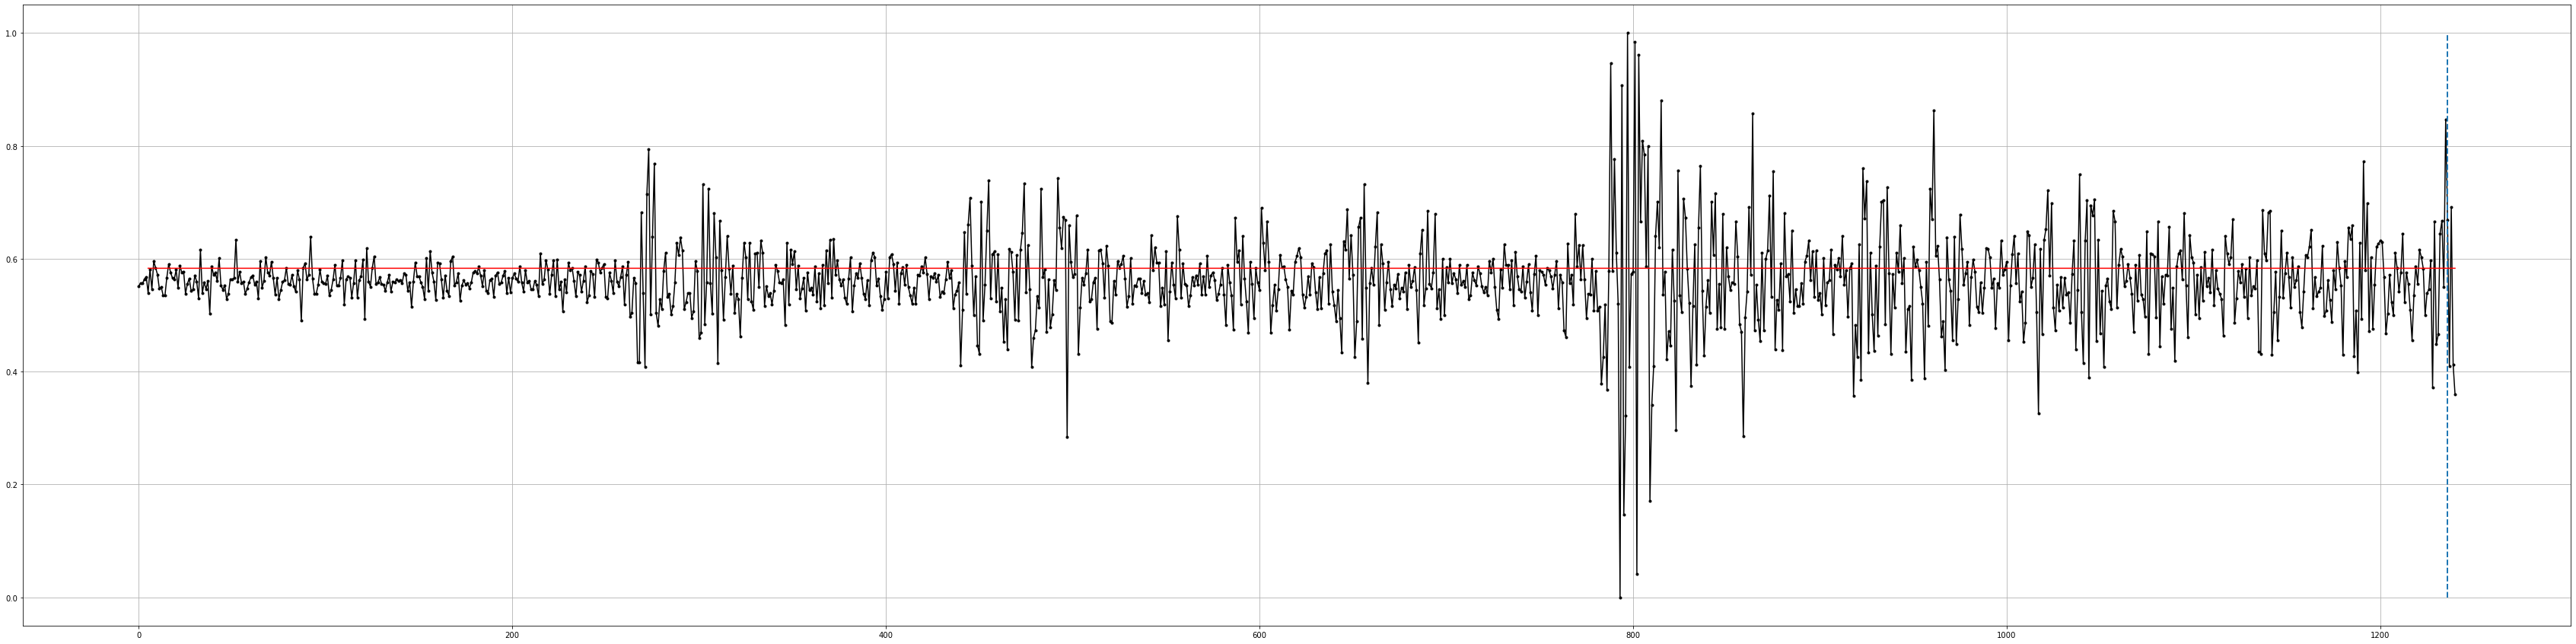

In [184]:
#Se genera el modelo con MLPRegresor

np.random.seed(123456)

mlp = MLPRegressor(
    hidden_layer_sizes=(50,),
    activation="logistic",
    learning_rate="adaptive",
    momentum=0.0,
    learning_rate_init=0.002,
    max_iter=20, #se deja hasta 20, ya que con segun 'verbose' incluso mas de 10, no puede mejorar
    verbose=True
)

mlp.fit(Xt[0:998], data_d1d5_scaled[0:998])

y_d1d5_scaled_m2 = mlp.predict(Xt)

plt.figure(figsize=(60, 15))
plt.plot(data_d1d5_scaled, ".-k")
plt.grid()

plt.plot([None] * P + y_d1d5_scaled_m2.tolist(), "-r")

plt.plot(
    [len(data_d1d5_scaled) - 5, len(data_d1d5_scaled) - 5],
    [min(data_d1d5_scaled), max(data_d1d5_scaled)],
    "--",
    linewidth=2,
);

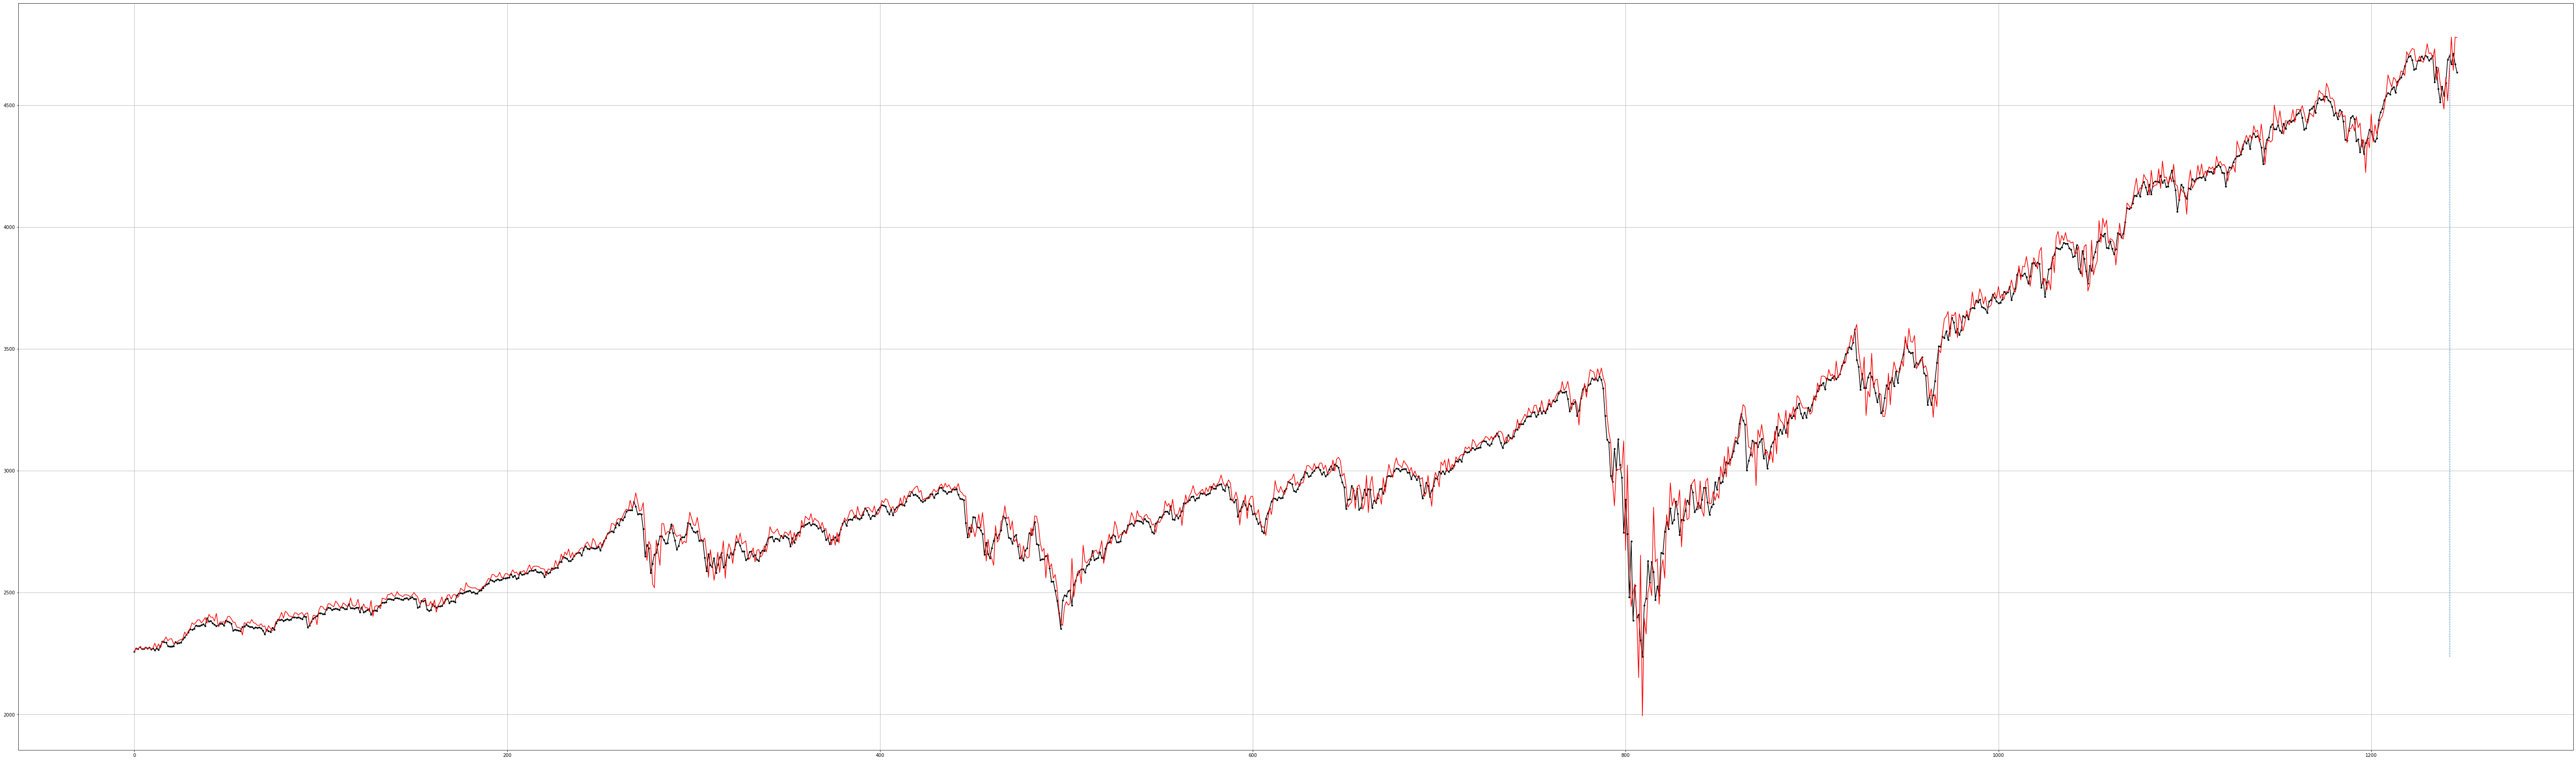

In [185]:
y_d1d5_scaled_m2 = data_d1d5_scaled[0:P] + y_d1d5_scaled_m2.tolist()

y_d1d5_m2 = scaler.inverse_transform([[u] for u in y_d1d5_scaled_m2])
y_d1d5_m2 = [u[0] for u in y_d1d5_m2.tolist()]

y_d1_m2 = [y_d1d5_m2[t] + data_d1[t] for t in range(len(y_d1d5_m2))]
y_d1_m2 = data_d1[0:5] + y_d1_m2

y_m2 = [y_d1_m2[t] + data[t] for t in range(len(y_d1_m2))]

y_m2 = [data[0]] + y_m2
plt.figure(figsize=(100, 30))
plt.plot(data, ".-k")
plt.grid()
plt.plot(y_m2, "-r")
plt.plot([len(data) - 5, len(data) - 5], [min(data), max(data)], "--", linewidth=1);

In [186]:
#Prediccion de serie futura

In [187]:
df_to_predict = pd.read_csv('./data/test_series.csv')

In [188]:
date_to_predict = pd.concat([df_to_predict["Year"], df_to_predict["Month"], df_to_predict["Date"]],axis=1)
date_to_predict.columns = ['year', 'month', 'day']

In [189]:
date_to_predict = pd.to_datetime(date_to_predict).astype(int)/ 10**9

/var/folders/ws/sp1qfps14rj2wpf5_71gh44m0000gn/T/ipykernel_3132/2503210136.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  date_to_predict = pd.to_datetime(date_to_predict).astype(int)/ 10**9


In [190]:
P = 5

Xt_predict = []
date_to_predictttt = date_to_predict.values
for t in range(1, len(date_to_predictttt)):
    Xt_predict.append([date_to_predictttt[t - n] for n in range(P)])

In [191]:
predicted_xt = mlp.predict(Xt_predict)

In [192]:
data_d1_1= data_d1[-17:]

In [193]:
data_1 = data[-17:]

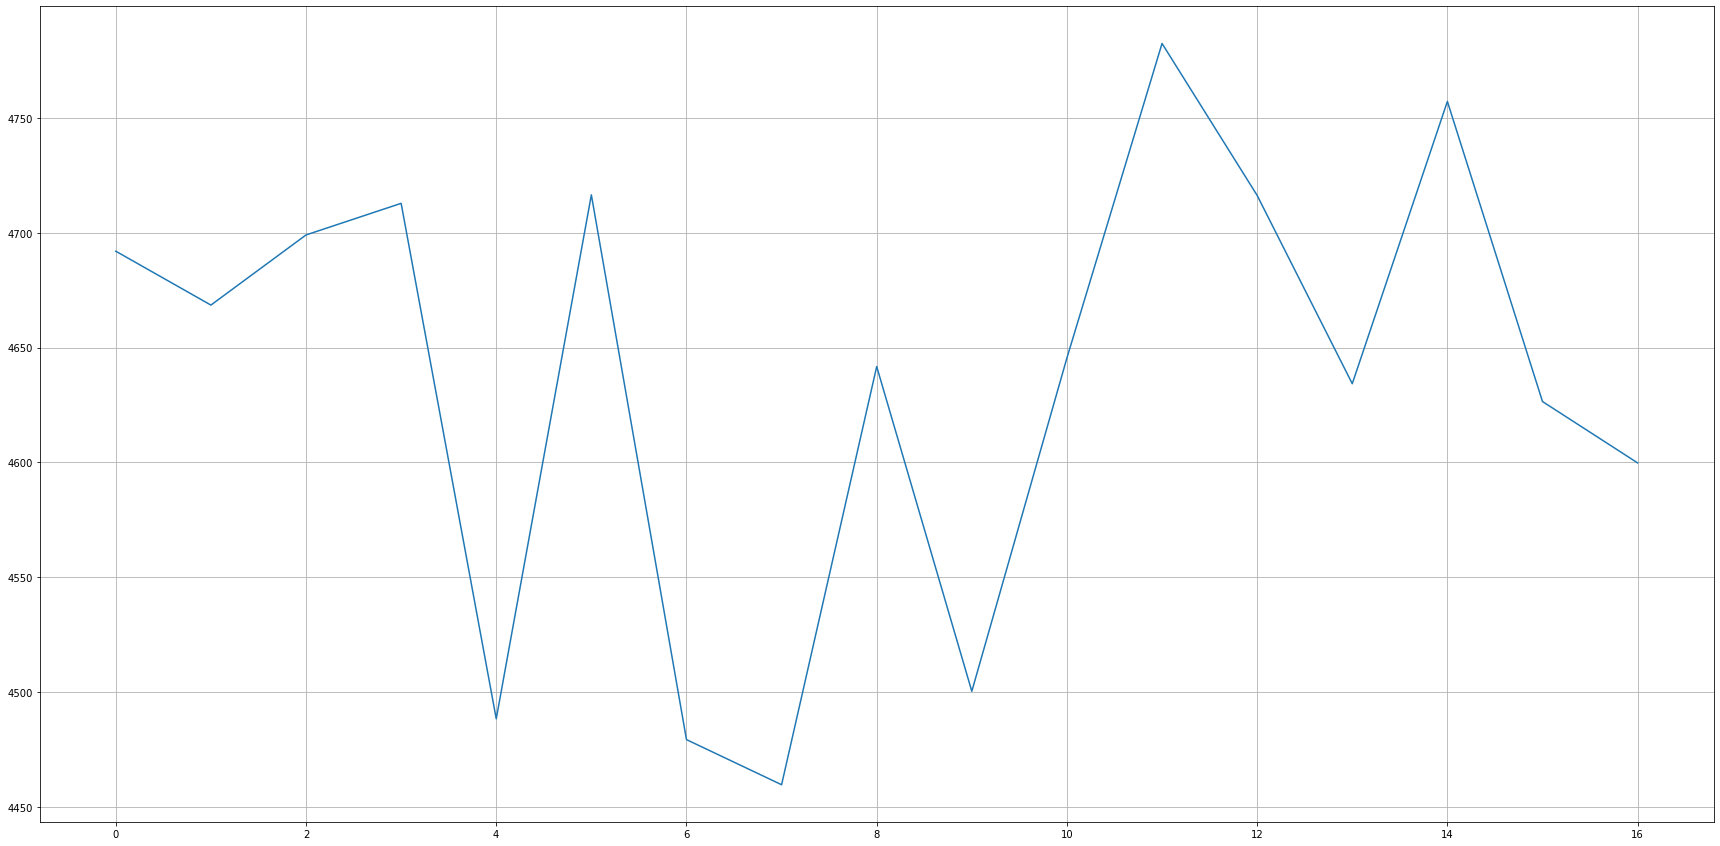

In [194]:
y_d1d5_scaled_m2_1 = predicted_xt.tolist()

y_d1_m2_1 = [y_d1d5_scaled_m2_1[t] + data_d1_1[t] for t in range(len(y_d1d5_scaled_m2_1))]
y_m2_1 = [y_d1_m2_1[t] + data_1[t] for t in range(len(y_d1_m2_1))]

plt.figure(figsize=(30, 15))
plt.grid()

plt.plot(y_m2_1)

In [195]:
y_m2_1

[4691.963117602398,
 4668.503156664898,
 4699.043684008648,
 4712.802961352398,
 4488.363508227398,
 4716.503156664898,
 4479.313215258648,
 4459.663312914898,
 4641.743391039898,
 4500.343488696148,
 4645.492902758648,
 4782.413312914898,
 4716.253156664898,
 4634.273664477398,
 4757.173078539898,
 4626.503644946148,
 4599.792707446148]

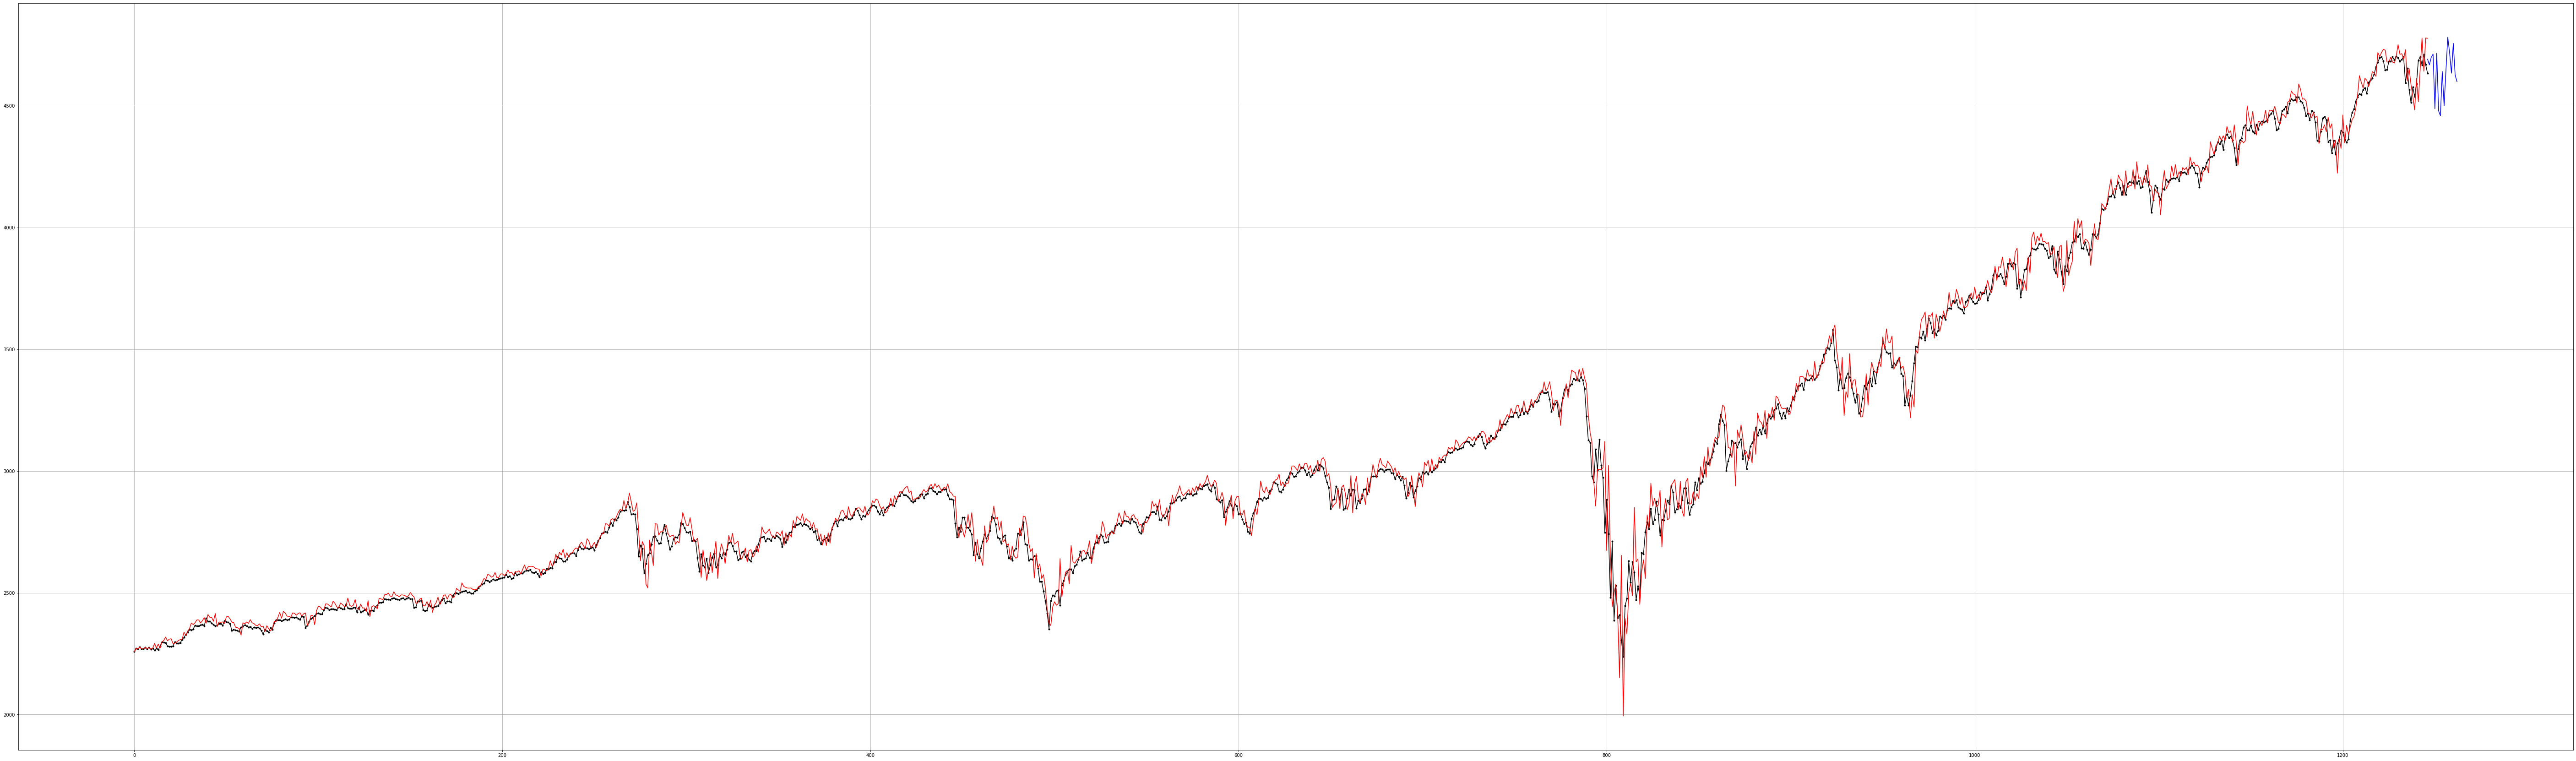

In [196]:
#Serie de tiempo predicha con datos de entrenamiento y con fechas futuras
plt.figure(figsize=(100, 30))
plt.plot(data, ".-k")
plt.grid()
plt.plot(y_m2, "-r")
plt.plot([None]*1246 + y_m2_1, "-b")

In [197]:
#La prediccion del entrenamiento esta en rojo
#La prediccion en base a las fechas esta en azul al final
#Intentamos que la imagen sea 'grande' para que se pueda apreciar que la prediccion con datos de entrenamiento, no esta totalmente apegada